In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> # Data Preprocessing

In [28]:
vids = pd.read_csv('../input/youtube-new/INvideos.csv')
categories = pd.read_json('../input/youtube-new/IN_category_id.json')

In [29]:
vids.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...


In [30]:
# Handling datatime data
vids["trending_date"] = pd.to_datetime(vids["trending_date"] , format="%y.%d.%m").dt.date
publish_time = pd.to_datetime(vids['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
vids['publish_date'] = publish_time.dt.date
vids['publish_time'] = publish_time.dt.time
vids['publish_hour'] = publish_time.dt.hour

vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,12
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,5
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,15
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2017-11-12,7
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,1


In [31]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [32]:
categories["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [33]:
categories.shape , vids.shape

((31, 3), (37352, 18))

In [34]:
# Using dictionary compresension to map categories
cats ={int(cat["id"]):cat["snippet"]["title"] for cat in categories["items"]}

vids["categories"] = vids["category_id"].map(cats)

In [35]:
vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,categories
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,12,Film & Animation
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",2017-11-13,5,News & Politics
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,15,Entertainment
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,2017-11-12,7,Comedy
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,1,Entertainment


In [36]:
# Number of word in title

vids["title_length"] = vids["title"].apply(lambda x : len(x.replace(" " , "")))

# Number of external links in description
# We have heard youtube tends to favor videos with min external links, lets see if it effects trending
def ext_link_cnt(text):
    import re
    urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    return len(urls)

vids["ext_links"] = vids["description"].fillna(" ").apply(ext_link_cnt)

0    0.022976
1    0.548330
2    0.107704
3    0.022573
4    0.369131
Name: dislike_percentage, dtype: float64

### Dislike percentage
#### Ratio of dislikes to total assessments i.e likes + dislikes and how they flare on trending.
#### We handle videos that have zero likes and dislikes by implementing weighted laplance moving.

In [ ]:
l_d_ratio = (vids["likes"]/vids["dislikes"]).dropna().median()
vids['dislike_percentage'] = (vids['dislikes']+1) / (vids['dislikes'] + vids['likes'] + l_d_ratio + 1)
vids['dislike_percentage'].head()

### Visulazing likes, dislikes, comments & views

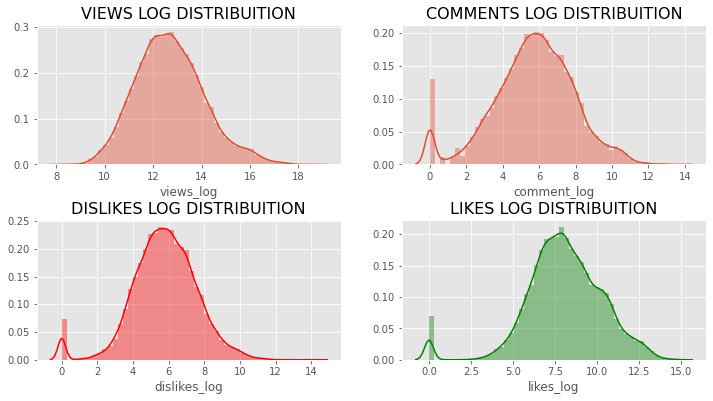

In [37]:
# Fixing skewness
vids['likes_log'] = np.log(vids['likes'] + 1)
vids['views_log'] = np.log(vids['views'] + 1)
vids['dislikes_log'] = np.log(vids['dislikes'] + 1)
vids['comment_log'] = np.log(vids['comment_count'] + 1)


# Views, Comments, Likes and Dislikes Visulization
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(vids['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(vids['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(vids['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(vids['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.savefig("firstvisual.png" , bbox_inches="tight")
plt.show()

In [38]:
# Now several videos have been treading for many times, lets get rid of these for the purpose of our analysis
# to avoid duplicates

vids_last = vids.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
vids_first = vids.drop_duplicates(subset=['video_id'], keep='first', inplace=False)
vids_first.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_date,publish_hour,categories,title_length,ext_links,dislike_percentage,likes_log,views_log,dislikes_log,comment_log
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,2017-11-12,12,Film & Animation,67,5,0.022976,10.433145,13.907477,6.683361,6.783325
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,2017-11-13,5,News & Politics,47,5,0.548330,6.601230,13.288051,6.807935,0.000000
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,2017-11-12,15,Entertainment,49,9,0.107704,7.606885,13.068939,5.497168,5.010635


### Handling missing values

In [39]:
# Missing Values
vids.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
publish_date                0
publish_hour                0
categories                105
title_length                0
ext_links                   0
dislike_percentage          0
likes_log                   0
views_log                   0
dislikes_log                0
comment_log                 0
dtype: int64

In [40]:
null_data = vids[vids["categories"].isnull()]
null_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_date,publish_hour,categories,title_length,ext_links,dislike_percentage,likes_log,views_log,dislikes_log,comment_log
140,xzEbOteUiRY,2017-11-14,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,29,22:34:25,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",51575,0,0,...,2017-11-12,22,NaN,78,3,0.087218,0.000000,10.850812,0.000000,0.000000
198,OZU2E50G4KI,2017-11-14,ANUGRAH TV- 12-11-2017 Sunday Holy Communion M...,Ankur Narula Ministries,29,12:07:04,[none],17726,887,21,...,2017-11-12,12,NaN,56,2,0.023927,6.788972,9.782844,3.091042,4.574711
392,xzEbOteUiRY,2017-11-15,"ਅੰਮ੍ਰਿਤਸਰ” ਵਿੱਚ ਦੀਵਾਨ ਲਗਾਉਣਾ ਸਾਡਾ ਮਕਸਦ ਨਹੀਂ, ਸ...",Emm Pee,29,22:34:25,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",73442,0,0,...,2017-11-12,22,NaN,78,3,0.087218,0.000000,11.204265,0.000000,0.000000
630,io82HGyOf9s,2017-11-17,Stop Speak Support,Supercell,29,12:14:39,[none],164658,2670,386,...,2017-11-16,12,NaN,16,1,0.126163,7.890208,12.011632,5.958425,6.054439
708,z4aeaw3BH8Y,2017-11-17,इसी जन्म में अगले जन्म का इंश्योरेंस - Story ...,Sri Sri Ravi Shankar,29,16:13:49,"art of living|""sri sri ravi shankar""|""sri sri ...",10282,952,3,...,2017-11-16,16,NaN,62,4,0.004139,6.859615,9.238247,1.386294,2.944439


#### They all have cateory id of 29, lets assign a suitable category to this id

In [42]:
vids["categories"].fillna("Activism & Random", inplace = True) 
vids[vids["category_id"]  == 29]
vids[vids["category_id"]  == 29].tail(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,publish_date,publish_hour,categories,title_length,ext_links,dislike_percentage,likes_log,views_log,dislikes_log,comment_log
35267,6JNRoDQOZoc,2018-06-03,LIVE NOW | JUNE: MONTHLY DIWAN | 2 JUNE 2018 |...,Emm Pee,29,18:18:28,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",57686,3278,156,...,2018-06-02,18,Activism & Random,62,6,0.045567,8.095294,10.962787,5.056246,0.0
35473,6JNRoDQOZoc,2018-06-04,LIVE NOW | JUNE: MONTHLY DIWAN | 2 JUNE 2018 |...,Emm Pee,29,18:18:28,"Parmeshar|""Dwar""|""Trust""|""Sikh""|""Channel""|""Kha...",87287,3594,194,...,2018-06-02,18,Activism & Random,62,6,0.051323,8.187299,11.376968,5.273000,0.0


### Days before trending

In [43]:
vids["days_before_trend"] = (vids.trending_date - vids.publish_date) / np.timedelta64(1, 'D')
vids["days_before_trend"] = vids["days_before_trend"].astype(int)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,categories,title_length,ext_links,dislike_percentage,likes_log,views_log,dislikes_log,comment_log,days_before_trend,views_per_day
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,Film & Animation,67,5,0.022976,10.433145,13.907477,6.683361,6.783325,2,548163.5
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,News & Politics,47,5,0.548330,6.601230,13.288051,6.807935,0.000000,1,590101.0
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,Entertainment,49,9,0.107704,7.606885,13.068939,5.497168,5.010635,2,236994.0
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,Comedy,25,0,0.022573,11.161295,14.032782,7.393263,7.895436,2,621340.0
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,Entertainment,77,3,0.369131,6.200509,13.047674,5.683580,4.204693,1,464015.0


### Views Per Day

In [ ]:
vids.loc[(vids['days_before_trend'] < 1), 'days_before_trend'] = 1
vids["views_per_day"] = vids["views"] / vids["days_before_trend"]
vids["views_per_day"] = vids["views_per_day"]

vids.head()

#### Now lets finalize our modifications and save the dataframe

In [44]:
vids.drop(["title", "description"] , axis = 1 , inplace=True)
vids.to_csv("preprocessed_vids.csv" , index=False)

> # **Data Visualization**

In [45]:
plt.style.use("ggplot")

### Best time to publish videos

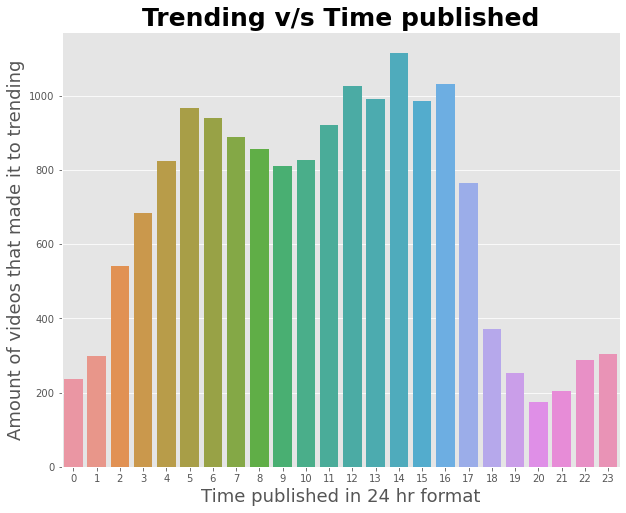

In [46]:
plt.figure(figsize=(10,8))

sns.barplot(vids_first["publish_hour"].value_counts().index , vids_first["publish_hour"].value_counts().values)

plt.title("Trending v/s Time published" , fontsize=25 , fontweight="bold")
plt.xlabel("Time published in 24 hr format" , fontsize=18)
plt.ylabel("Amount of videos that made it to trending" , fontsize=18)

plt.savefig("trendingvtime.png" , bbox_inches="tight")
plt.show()

### Corelation between features 

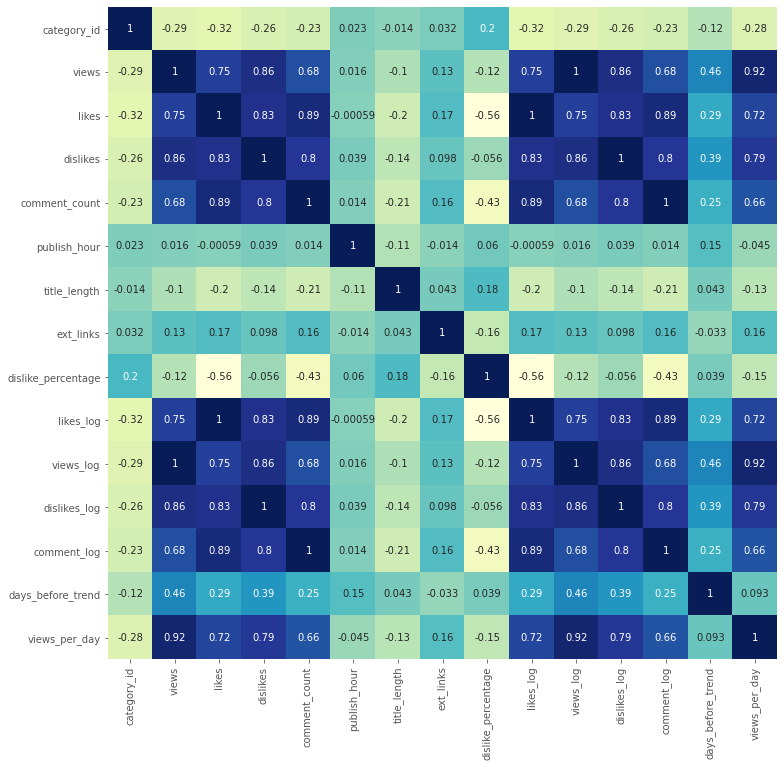

In [47]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

numerical_columns = [col for col in vids if vids[col].dtype in ["int64","float64"]]
sns.heatmap(vids[numerical_columns].corr("spearman"), annot=True, cmap="YlGnBu", ax=ax , cbar=False)

plt.savefig("featurecorr.png" , bbox_inches="tight")
plt.show()

### Title Word Count v/s Trending

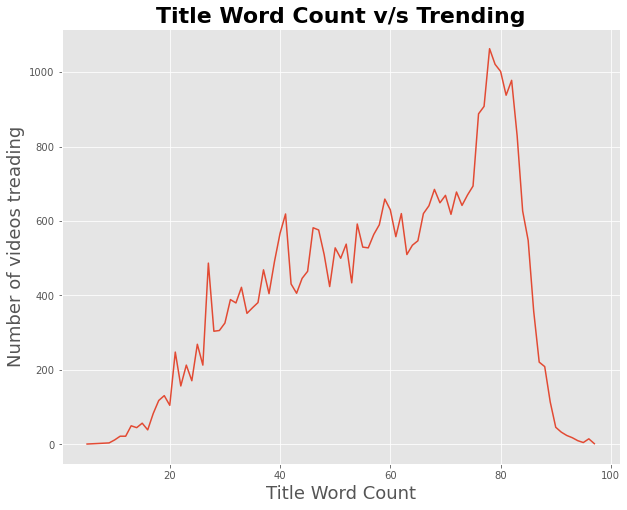

In [48]:
fig = plt.figure(figsize=(10,8))

plt.plot(vids["title_length"].value_counts().sort_index().index, 
         vids["title_length"].value_counts().sort_index().values)

plt.title("Title Word Count v/s Trending" , fontsize=22 , fontweight="bold")
plt.xlabel("Title Word Count" , fontsize=18)
plt.ylabel("Number of videos treading", fontsize=18)

plt.savefig("titleword.png" , bbox_inches="tight")
plt.show()

### External Links in Video Discription v/s Trending

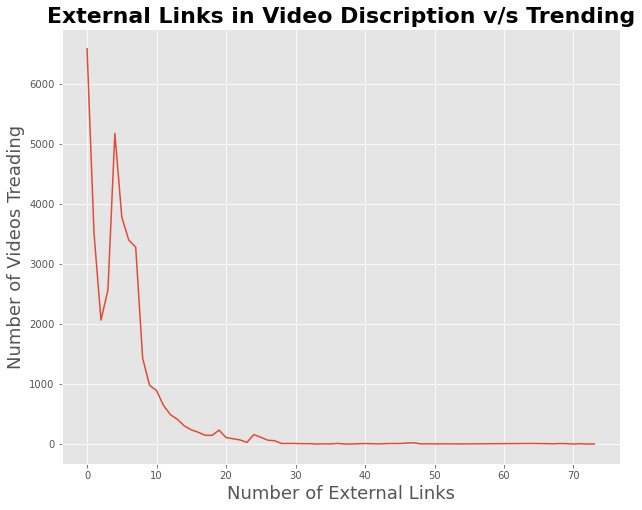

In [49]:
fig = plt.figure(figsize=(10,8))

plt.plot(vids["ext_links"].value_counts().sort_index().index,
         vids["ext_links"].value_counts().sort_index().values)

plt.title("External Links in Video Discription v/s Trending" , fontsize=22 , fontweight="bold")
plt.xlabel("Number of External Links" , fontsize=18)
plt.ylabel("Number of Videos Treading", fontsize=18)

plt.savefig("ext_links.png" , bbox_inches="tight")
plt.show()

> #### We see a sharp dip from 0 to 2 and then a rise again.
> #### This maybe happing because of small creators vs big channels, small creators don't make it easily to trending and include about 1-3 links to their other social media whereas big channels trend more and also include more links than smaller channels.

### Most trending channels
#### Channels with the high videos on trending

Text(0.5, 1.0, 'Most Trending Channels')

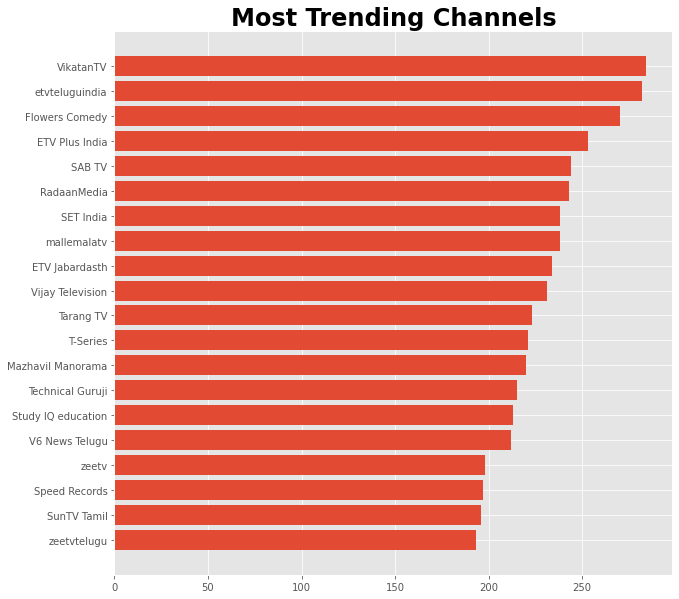

In [59]:
fig = plt.figure(figsize=(10,10))

ch_names = vids.groupby("channel_title")["video_id"].count().sort_values(ascending=False).index[:20]
cnts = vids.groupby("channel_title")["video_id"].count().sort_values(ascending=False).values[:20]

plt.barh(ch_names[::-1] , cnts[::-1])
plt.title("Most Trending Channels" , fontsize=24 , fontweight="bold")

plt.savefig("trending_channels.png" , bbox_inches="tight")
plt.show()

### Most trending topics
#### Topics which occupy most space on trending

Text(0.5, 1.0, 'Most Trending Topics')

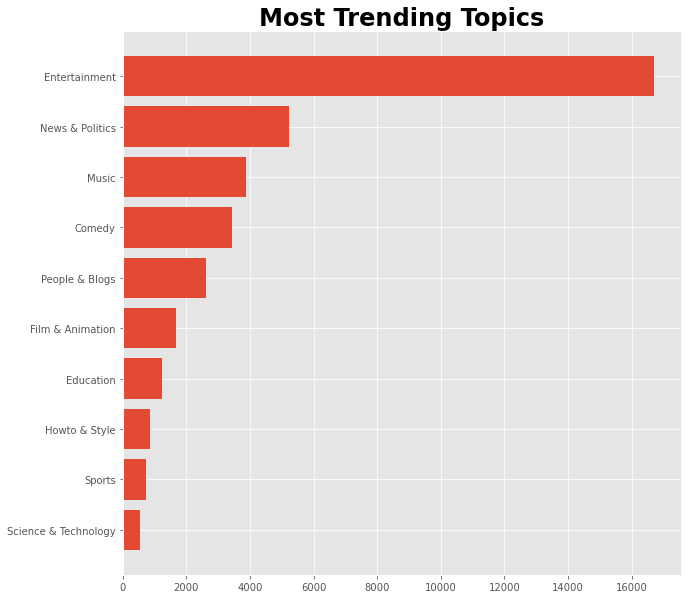

In [62]:
fig = plt.figure(figsize=(10,10))

topic_names = vids.groupby("categories")["video_id"].count().sort_values(ascending=False).index[:10]
cnts = vids.groupby("categories")["video_id"].count().sort_values(ascending=False).values[:10]

plt.barh(topic_names[::-1] , cnts[::-1])
plt.title("Most Trending Topics" , fontsize=24 , fontweight="bold")

plt.savefig("trending_channels.png" , bbox_inches="tight")
plt.show()

### Days before trending
#### Distribution of how many days on average it takes for a video to make it to trending.

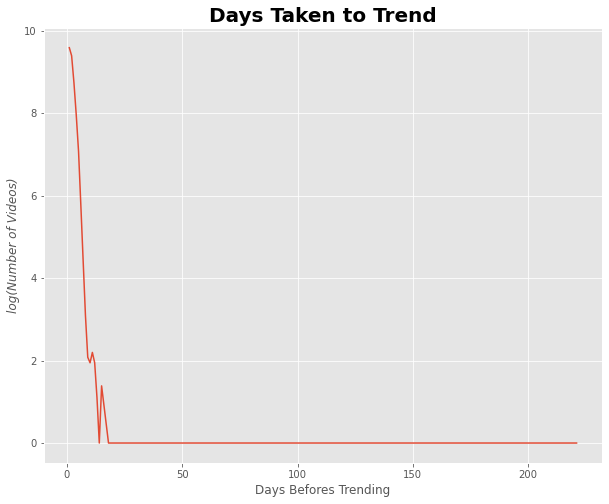

In [75]:
fig = plt.figure(figsize=(10,8))

plt.plot(vids["days_before_trend"].value_counts().sort_index().index,
        np.log(vids["days_before_trend"].value_counts().sort_index().values))

plt.xlabel("Days Befores Trending")
plt.ylabel("log(Number of Videos)" , fontstyle="italic")
plt.title("Days Taken to Trend" , fontsize=20 , fontweight="bold")

plt.savefig("days_taken.png" , bbox_inches="tight")
plt.show()

### Any publicity is good publicity / Most Hated Videos
#### In this section we look at the most hated videos i.e. that got trending by dislikes.

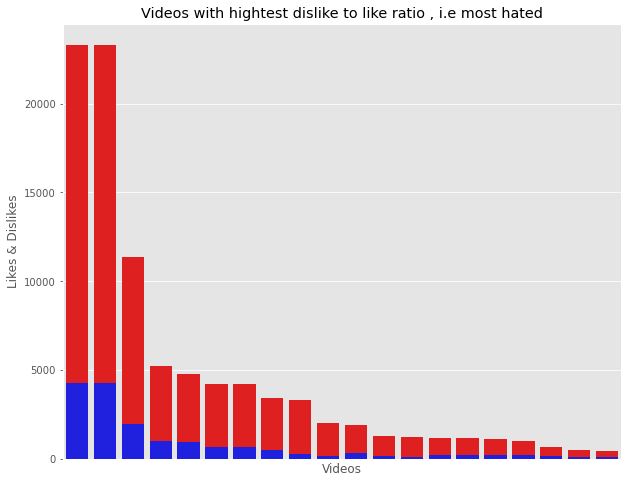

In [93]:
disliked_vids = vids.copy().sort_values(by="dislike_percentage" , ascending=False)[:20]
disliked_vids.sort_values(by="dislikes" , ascending=False , inplace=True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

sns.barplot(np.arange(0,20) , disliked_vids["dislikes"] , ax=ax , color="r")
sns.barplot(np.arange(0,20) , disliked_vids["likes"] , ax=ax , color="b")

plt.ylabel("Likes & Dislikes")
plt.xlabel("Videos")
plt.title("Videos with hightest dislike to like ratio")
plt.xticks([])

plt.savefig("hated.png" , bbox_inches="tight")
plt.show()

### Tags that help Vidoes reach Trending
#### Lets create a workcloud to a picture of most popular tags.

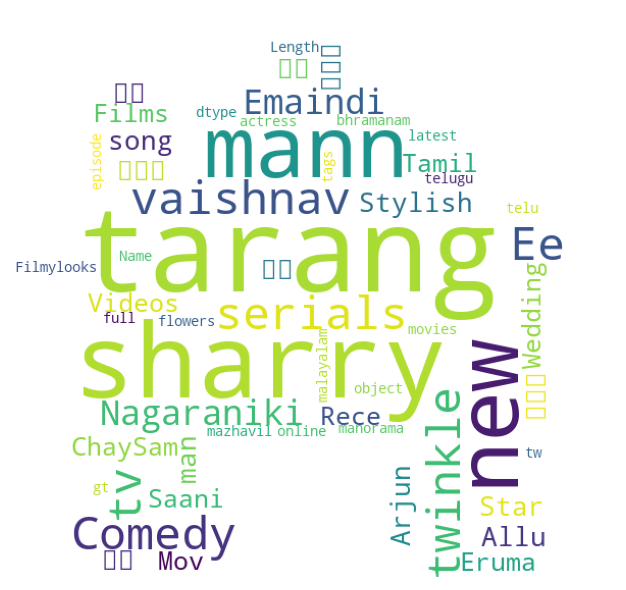

In [96]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests


mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(vids["tags"]))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig("wordcloud.png" , bbox_inches="tight")
    plt.show()
    
generate_wordcloud(mask)